# Package dan Fungsi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto, cramervonmises

In [2]:
def MRL(sample, threshold_estimate=None):
    mag = sample.sort_values()
    maxx = mag.max()
    minn = mag.min()
    x = np.arange(minn, maxx, 0.01)
    y = []
    for i in x:
        if np.sum(mag > i) > 0:
            e_u = np.mean(mag[mag > i]) - i
        else:
            e_u = np.nan
        y.append(e_u)
    plt.plot(x, y, label='mean excess, e(u)')
    # Garis percentile ke-90 (kuning)
    perc_90 = np.quantile(mag, 0.90)
    plt.vlines(x=perc_90, ymin=np.nanmin(y), ymax=np.nanmax(y), colors='green', linestyle='dashed', label='percentile 90')
    # Garis percentile ke-95 (coklat)
    perc_95 = np.quantile(mag, 0.95)
    plt.vlines(x=perc_95, ymin=np.nanmin(y), ymax=np.nanmax(y), colors='brown', linestyle='dashed', label='percentile 95')
    # Garis threshold estimate (manual)
    if threshold_estimate is not None:
        plt.vlines(x=threshold_estimate, ymin=np.nanmin(y), ymax=np.nanmax(y), colors='gold', linestyle='dashed', label='threshold estimate')
        # Garis hitam penghubung
        idx_95 = np.argmin(np.abs(x - perc_95))
        idx_thr = np.argmin(np.abs(x - threshold_estimate))
        plt.plot([x[idx_95], x[idx_thr]], [y[idx_95], y[idx_thr]], color='k', linewidth=2)
    plt.xlabel('u')
    plt.ylabel('mean excess, e(u)')
    plt.title('Mean Residual Life Plot')
    plt.legend()
    plt.show()
    return x, y, mag, perc_90, perc_95, threshold_estimate

In [3]:
def gpd_cvm_aic_bic_test(data, thresholds):
    results = []
    for u in thresholds:
        excess = data[data > u] - u
        n = len(excess)
        if n < 20:
            continue
        # Fit GPD
        params = genpareto.fit(excess)
        # Cramer-von Mises test
        cvm_res = cramervonmises(excess, 'genpareto', args=params)
        p_value = cvm_res.pvalue
        loglik = np.sum(genpareto.logpdf(excess, *params))
        k = 2  # number of parameters: shape and scale
        aic = 2 * k - 2 * loglik
        bic = k * np.log(n) - 2 * loglik
        results.append((u, loglik, aic, bic, cvm_res.statistic, p_value))
    # Filter p-value > 0.05 dan urutkan loglik terbesar
    filtered = [r for r in results if r[5] > 0.05]
    return sorted(filtered, key=lambda x: -x[1])  # sort by loglik descending

# M7

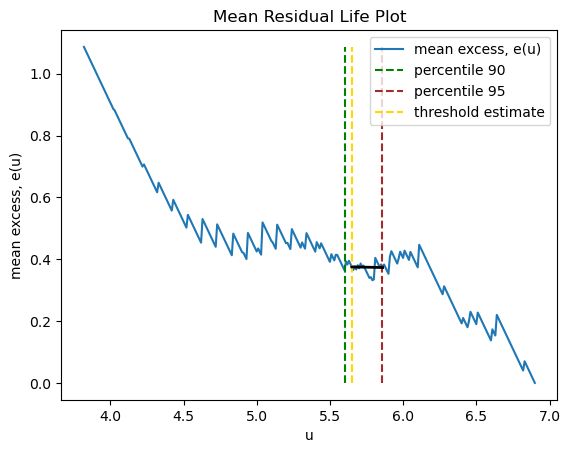

Percentile ke-90: 5.6030
Percentile ke-95: 5.8570
Threshold estimate: 5.65


In [4]:
df1 = pd.read_csv('../Data/M7 Declustering.csv')

x1, y1, mag1, perc_901, perc_951, threshold_estimate1 = MRL(df1['mag'], threshold_estimate=5.65)
print(f"Percentile ke-90: {perc_901:.4f}")
print(f"Percentile ke-95: {perc_951:.4f}")
print(f"Threshold estimate: {threshold_estimate1}")

In [5]:
data1 = df1['mag']
percentile_thresholds1 = np.percentile(data1, [85, 90, 92.5, 95, 97.5])
all_thresholds1 = np.append(percentile_thresholds1, threshold_estimate1)

cvm_results1 = gpd_cvm_aic_bic_test(data1, all_thresholds1)
for r in cvm_results1:
    print(f"Threshold={r[0]:.3f}, LogLik={r[1]:.2f}, AIC={r[2]:.2f}, BIC={r[3]:.2f}, CvM Stat={r[4]:.3f}, p-value={r[5]:.3f}")

Threshold=5.650, LogLik=0.77, AIC=2.46, BIC=5.57, CvM Stat=0.089, p-value=0.647
Threshold=5.857, LogLik=0.43, AIC=3.15, BIC=5.14, CvM Stat=0.157, p-value=0.370
Threshold=5.707, LogLik=0.02, AIC=3.96, BIC=6.70, CvM Stat=0.124, p-value=0.480
Threshold=5.603, LogLik=-0.88, AIC=5.75, BIC=9.08, CvM Stat=0.067, p-value=0.771
Threshold=5.336, LogLik=-7.44, AIC=18.89, BIC=22.97, CvM Stat=0.055, p-value=0.846


# M8

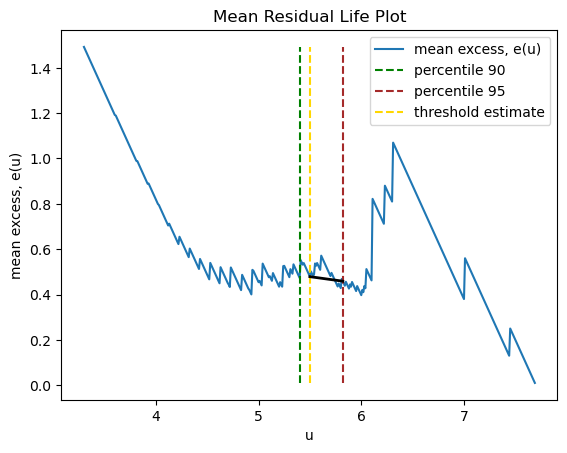

Percentile ke-90: 5.4000
Percentile ke-95: 5.8185
Threshold estimate: 5.5


In [6]:
df2 = pd.read_csv('../Data/M8 Declustering.csv')

x2, y2, mag2, perc_902, perc_952, threshold_estimate2 = MRL(df2['mag'], threshold_estimate=5.5)
print(f"Percentile ke-90: {perc_902:.4f}")
print(f"Percentile ke-95: {perc_952:.4f}")
print(f"Threshold estimate: {threshold_estimate2}")

In [7]:
data2 = df2['mag']
percentile_thresholds2 = np.percentile(data2, [85, 90, 92.5, 95, 97.5])
all_thresholds2 = np.append(percentile_thresholds2, threshold_estimate2)

cvm_results2 = gpd_cvm_aic_bic_test(data2, all_thresholds2)
for r in cvm_results2:
    print(f"Threshold={r[0]:.3f}, LogLik={r[1]:.2f}, AIC={r[2]:.2f}, BIC={r[3]:.2f}, CvM Stat={r[4]:.3f}, p-value={r[5]:.3f}")

Threshold=5.500, LogLik=-7.16, AIC=18.32, BIC=21.06, CvM Stat=0.133, p-value=0.447
Threshold=5.547, LogLik=-8.98, AIC=21.97, BIC=24.41, CvM Stat=0.121, p-value=0.495
Threshold=5.400, LogLik=-11.65, AIC=27.31, BIC=30.24, CvM Stat=0.096, p-value=0.608
Threshold=5.235, LogLik=-16.43, AIC=36.86, BIC=40.56, CvM Stat=0.057, p-value=0.835


# M9

Percentile ke-90: 5.3357
Percentile ke-95: 5.6000
Threshold estimate: 5.45


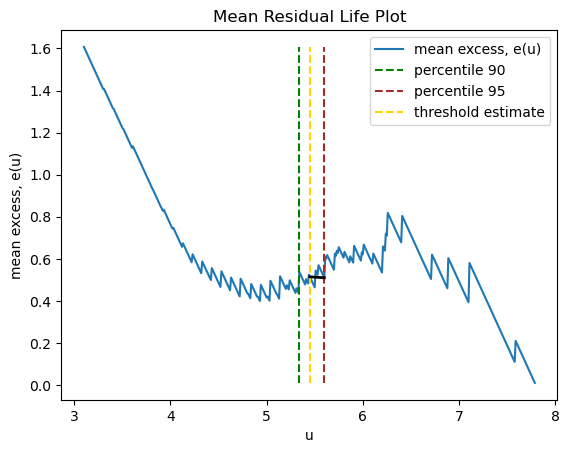

In [13]:
df3 = pd.read_csv('../Data/M9 Declustering.csv')

x3, y3, mag3, perc_903, perc_953, threshold_estimate3 = MRL(df3['mag'], threshold_estimate=5.45)
print(f"Percentile ke-90: {perc_903:.4f}")
print(f"Percentile ke-95: {perc_953:.4f}")
print(f"Threshold estimate: {threshold_estimate3}")

In [14]:
data3 = df3['mag']
percentile_thresholds3 = np.percentile(data3, [85, 90, 92.5, 95, 97.5])
all_thresholds3 = np.append(percentile_thresholds3, threshold_estimate3)

cvm_results3 = gpd_cvm_aic_bic_test(data3, all_thresholds3)
for r in cvm_results3:
    print(f"Threshold={r[0]:.3f}, LogLik={r[1]:.2f}, AIC={r[2]:.2f}, BIC={r[3]:.2f}, CvM Stat={r[4]:.3f}, p-value={r[5]:.3f}")

Threshold=5.450, LogLik=-6.89, AIC=17.78, BIC=21.00, CvM Stat=0.118, p-value=0.506
Threshold=5.500, LogLik=-10.08, AIC=24.15, BIC=27.02, CvM Stat=0.057, p-value=0.837
Threshold=5.600, LogLik=-11.27, AIC=26.55, BIC=28.82, CvM Stat=0.030, p-value=0.978
Threshold=5.336, LogLik=-11.29, AIC=26.57, BIC=30.14, CvM Stat=0.041, p-value=0.931
Threshold=5.134, LogLik=-14.19, AIC=32.39, BIC=36.88, CvM Stat=0.060, p-value=0.815


# All Visual

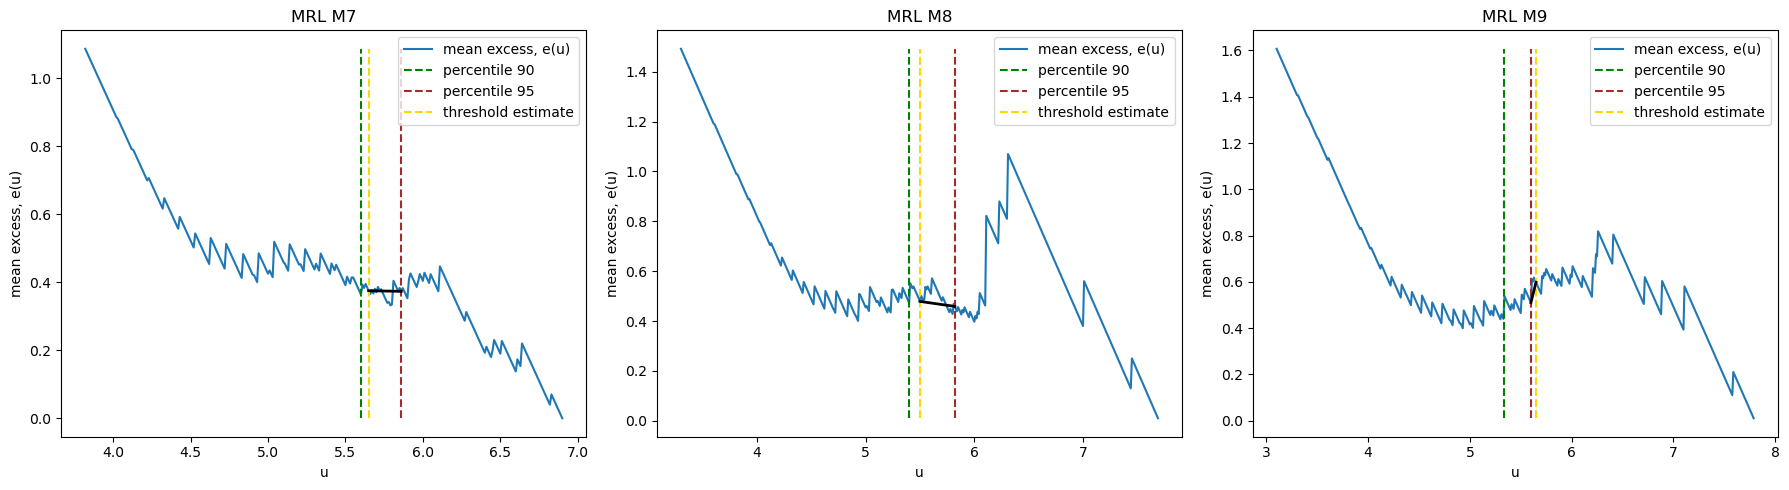

In [15]:
def MRL(sample, threshold_estimate=None):
    mag = sample.sort_values()
    maxx = mag.max()
    minn = mag.min()
    x = np.arange(minn, maxx, 0.01)
    y = []
    for i in x:
        if np.sum(mag > i) > 0:
            e_u = np.mean(mag[mag > i]) - i
        else:
            e_u = np.nan
        y.append(e_u)
    plt.plot(x, y, label='mean excess, e(u)')
    perc_90 = np.quantile(mag, 0.90)
    plt.vlines(x=perc_90, ymin=np.nanmin(y), ymax=np.nanmax(y), colors='green', linestyle='dashed', label='percentile 90')
    perc_95 = np.quantile(mag, 0.95)
    plt.vlines(x=perc_95, ymin=np.nanmin(y), ymax=np.nanmax(y), colors='brown', linestyle='dashed', label='percentile 95')
    if threshold_estimate is not None:
        plt.vlines(x=threshold_estimate, ymin=np.nanmin(y), ymax=np.nanmax(y), colors='gold', linestyle='dashed', label='threshold estimate')
        idx_95 = np.argmin(np.abs(x - perc_95))
        idx_thr = np.argmin(np.abs(x - threshold_estimate))
        plt.plot([x[idx_95], x[idx_thr]], [y[idx_95], y[idx_thr]], color='k', linewidth=2)
    plt.xlabel('u')
    plt.ylabel('mean excess, e(u)')
    plt.title('Mean Residual Life Plot')
    plt.legend()
    # plt.show()  # HAPUS BARIS INI!
    return x, y, mag, perc_90, perc_95, threshold_estimate

# Plot 3 gambar dalam 1 frame
fig = plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
MRL(df1['mag'], threshold_estimate=5.65)
plt.title('MRL M7')

plt.subplot(1, 3, 2)
MRL(df2['mag'], threshold_estimate=5.5)
plt.title('MRL M8')

plt.subplot(1, 3, 3)
MRL(df3['mag'], threshold_estimate=5.65)
plt.title('MRL M9')

plt.tight_layout()
plt.show()